In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
#Expanded Data
plants_features = np.array([[3,1],[2,2],[4,1],[3,2],[5,1],[2,2],[4,1],[5,2],
                            [3,1],[4,2],[5,1],[3,2],[2,1],[4,2],[3,1],[4,2],
                            [5,1],[2,2],[3,1],[4,2],[2,1],[5,2],[3,1],[4,2]
])
plants_species = np.array([
    0,1,0,1,0,1,0,1,
    0,1,0,1,0,1,0,1,
    0,1,0,1,0,1,0,1
])


In [3]:
#Train-test Split
X_Train,X_Test ,y_train,y_test = train_test_split(plants_features, plants_species, test_size=0.25, random_state=42)

#Creating Random Forest Model
model = RandomForestClassifier(n_estimators=10 ,random_state=42)
#Training the Model
model.fit(X_Train, y_train)



RandomForestClassifier(n_estimators=10, random_state=42)

In [4]:
#Prediction & Evaluations
y_pred = model.predict(X_Test)
classification_rep = classification_report(y_test, y_pred)


In [5]:
#Displaying the results
print("Classification Report: ")
print(classification_rep)


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



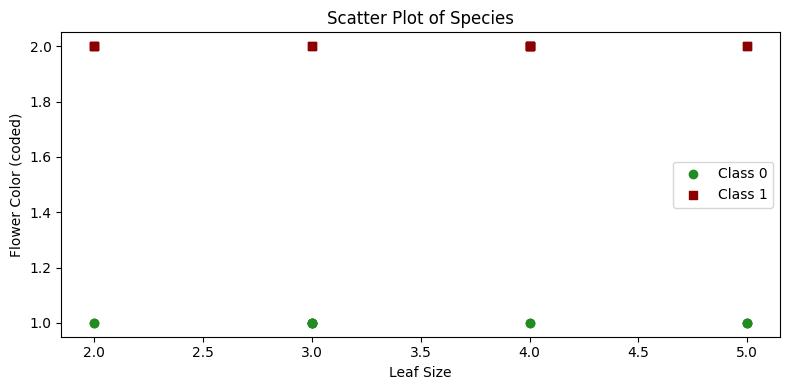

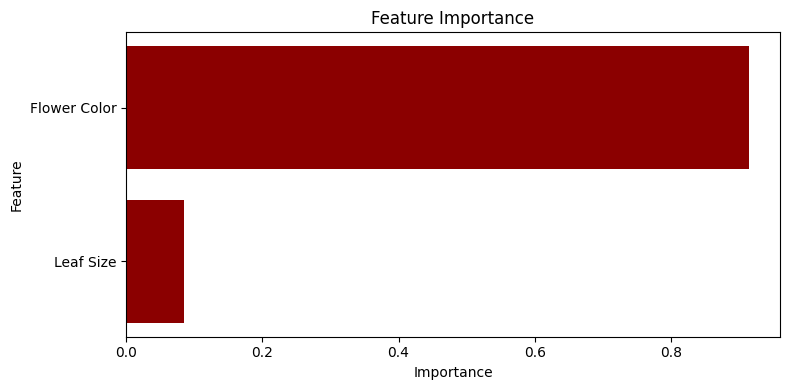

In [6]:
output_folder = r"E:\Machine Learning\Models\Random Forest\output" # add your own
#Scatter plot visualization classes
plt.figure(figsize=(8,4))
for species, marker, color in zip([0,1],['o', 's'], ['forestgreen', 'darkred']):
    plt.scatter(plants_features[plants_species == species, 0],
                plants_features[plants_species == species, 1],
                marker=marker,
                color=color,
                label=f'Class {species}'
                )
plt.xlabel('Leaf Size')
plt.ylabel('Flower Color (coded)')
plt.title('Scatter Plot of Species')
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_folder}/Scatter Plot of Species.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()

#Visualizing Feature Importance
plt.figure(figsize=(8, 4))
features_importance = model.feature_importances_
features =["Leaf Size", "Flower Color"]
plt.barh(features, features_importance, color="darkred")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(f"{output_folder}/Feature Importance.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()



